# Проект: анализ популярного сервиса аренды самокатов GoFast.

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
- Сервисом можно пользоваться:
-- без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8 рублей;
стоимость старта (начала поездки) — 
50 рублей;
-- с подпиской Ultra
абонентская плата — 
199 рублей в месяц;
стоимость одной минуты поездки — 
6 рублей;
стоимость старта — бесплатно.

**План выполнения работы:**
- 1. Загрузка данных
- 2. Предобработка данных
    - 2.1 Приведите столбец date к типу даты pandas.
    - 2.2 Создайте новый столбец с номером месяца на основе столбца date.
    - 2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.
- 3. Исследовательский анализ данных. Опишите и визуализируйте общую информацию о пользователях и поездках:
    - 3.1 частота встречаемости городов;
    - 3.2 соотношение пользователей с подпиской и без подписки;
    - 3.3 возраст пользователей;
    - 3.4 расстояние, которое пользователь преодолел за одну поездку;
    - 3.5 продолжительность поездок.
- 4. Объединение данных
    - 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
    - 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
        - c данными о пользователях без подписки;
        - с данными о пользователях с подпиской.
    - 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.
- 5. Подсчёт выручки
    - 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    - 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.
- 6. Проверка гипотез. Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
    - 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
    - 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
    - 6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
    - 6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

## Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('c:/Users/User/Downloads/users_go.csv')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:
    rides = pd.read_csv('c:/Users/User/Downloads/rides_go.csv')
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('c:/Users/User/Downloads/subscriptions_go.csv')
subscriptions.info()
subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Вывод: 
- Данные успешно загружены из файлов. Данные соответствуют описанию.
- В данных отсутствуют пропуски, наименование столбцов корректно.

## Шаг 2. Предобработка данных

#### 2.1 Приведем столбец date к типу даты pandas.

In [5]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')
rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

#### 2.2 Создадим новый столбец с номером месяца на основе столбца date.

In [6]:
rides['month'] = rides['date'].dt.month
rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int32

In [7]:
print(rides['date'].min())
print(rides['date'].max())

2021-01-01 00:00:00
2021-12-30 00:00:00


#### 2.3 Проверьрим наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [8]:
#users.isna().sum()
#rides.isna().sum()
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [9]:
print(users.duplicated().sum())
print(rides.duplicated().sum())
print(subscriptions.duplicated().sum())

31
0
0


In [10]:
users = users.drop_duplicates()

In [11]:
users = users.reset_index(drop=True)

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


### Вывод
- Приведен столбец date к типу даты pandas(datetime64).
- Создан новый столбец с номером месяца на основе столбца date.
- Проверено наличие пропущенных значений и дубликатов в датафреймах. Найденые дубликаты удалены, пропусков не обнаружено.

## Шаг 3. Исследовательский анализ данных

### Опишем и визуализируем общую информацию о пользователях и поездках

#### 3.1 частота встречаемости городов

In [13]:
users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

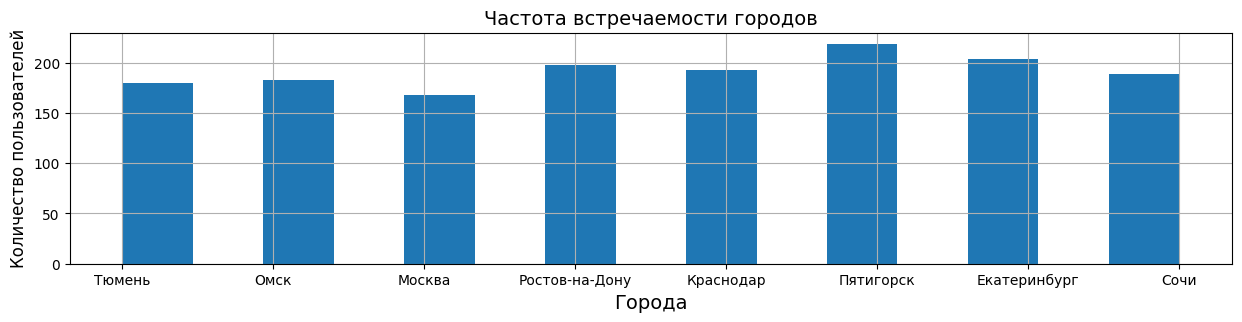

In [14]:
users.city.hist(bins = 15, figsize = (15,3));
plt.title("Частота встречаемости городов", fontsize=14)
plt.xlabel("Города", fontsize=14)
plt.ylabel("Количество пользователей", fontsize=12);

#### 3.2 соотношение пользователей с подпиской и без подписки

In [15]:
users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

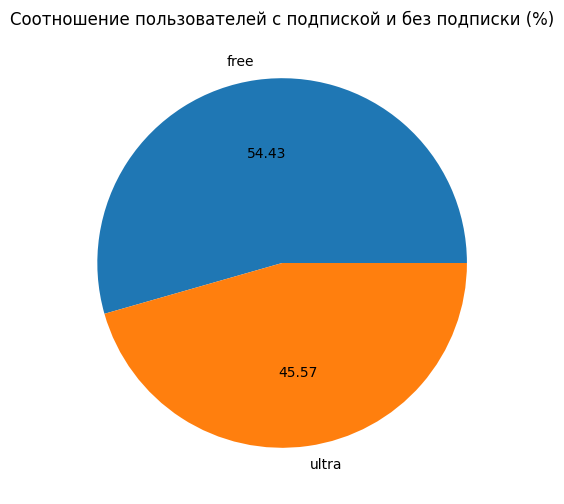

In [16]:
y = np.array(users['subscription_type'].value_counts())
mylabels = ["free", "ultra"]
plt.figure(figsize=(6, 6))
plt.pie(y, labels = mylabels, autopct='%.2f')
plt.title('Соотношение пользователей с подпиской и без подписки (%)')
plt.show()

#### 3.3 возраст пользователей

In [17]:
users['age'].value_counts()

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: count, dtype: int64

In [18]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

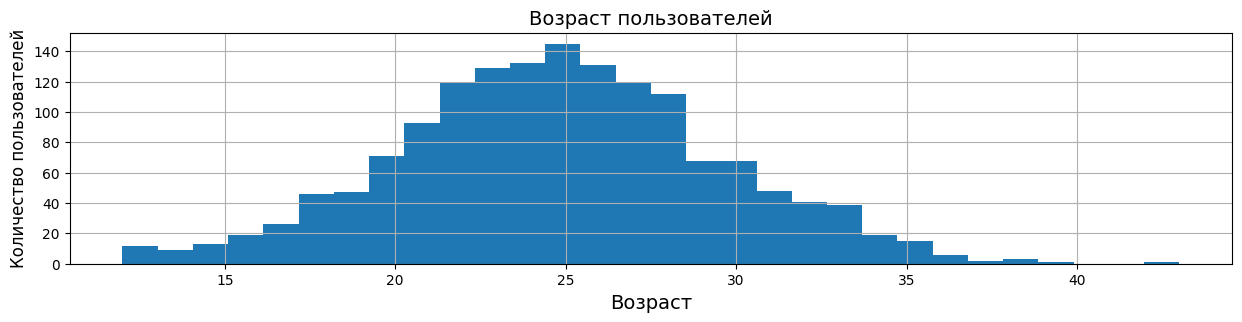

In [19]:
users.age.hist(bins = 30, figsize = (15,3));
plt.title("Возраст пользователей", fontsize=14)
plt.xlabel("Возраст", fontsize=14)
plt.ylabel("Количество пользователей", fontsize=12);

#### 3.4 расстояние, которое пользователь преодолел за одну поездку

In [20]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

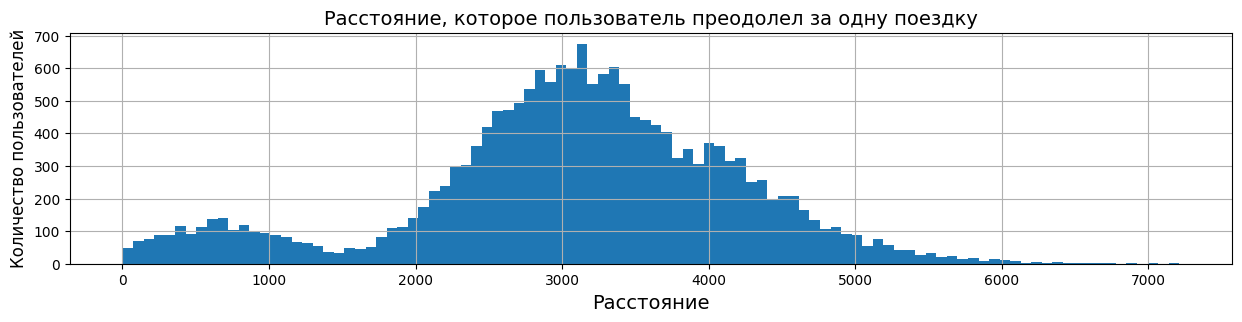

In [21]:
rides.distance.hist(bins = 100, figsize = (15,3));
plt.title("Расстояние, которое пользователь преодолел за одну поездку", fontsize=14)
plt.xlabel("Расстояние", fontsize=14)
plt.ylabel("Количество пользователей", fontsize=12);

#### 3.5 продолжительность поездок

In [22]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [23]:
rides = rides.loc[(rides['duration'].isna()) | ((rides['duration'] >= 1))]

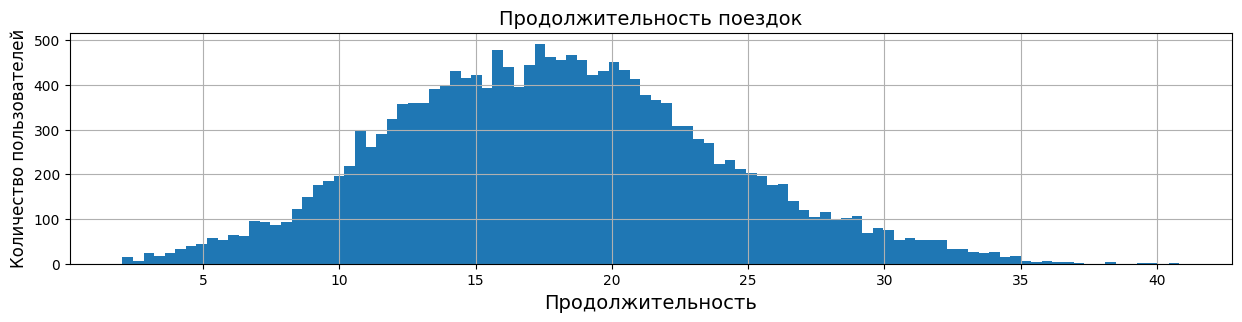

In [24]:
rides.duration.hist(bins = 100, figsize = (15,3));
plt.title("Продолжительность поездок", fontsize=14)
plt.xlabel("Продолжительность", fontsize=14)
plt.ylabel("Количество пользователей", fontsize=12);

- Удалим поездки короче 1 минуты, т.к. этих значений много и они будут влиять на общее время поездки. Они возможно появились из-за пробных поездок.

### Вывод
- Из городов чаще всего встречается Пятигорск, а реже всего Москва.
- Соотношение пользователей с подпиской и без подписки отличается примерно на 16%.
- Средний возраст пользователей 25 лет в диапазоне от 12 лет до 43 лет.
- Среднее расстояние, которое пользователи преодолевают за одну поездку примерно 3100 м в диапазоне от 1 м до 7211 м.
- Средняя продолжительность поездок в районе 18 минут в диапазоне от 0.5 минут до 40 минут.

## Шаг 4. Объединение данных

#### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [25]:
data = users\
    .merge(rides, on='user_id', how='left')\
    .merge(subscriptions, on='subscription_type', how='left')\

data.head()    

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   distance           17973 non-null  float64       
 6   duration           17973 non-null  float64       
 7   date               17973 non-null  datetime64[ns]
 8   month              17973 non-null  int32         
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


- Объеденив датафреймы, видим что количество всех строк одинаково и нет пропусков.

#### 4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

- c данными о пользователях без подписки

In [27]:
data_ultra = data[data['subscription_type'] == 'ultra'].reset_index()
data_ultra.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


- с данными о пользователях с подпиской.

In [28]:
data_free = data[data['subscription_type'] == 'free'].reset_index()
data_free.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


#### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

- Информация о времени поездки

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


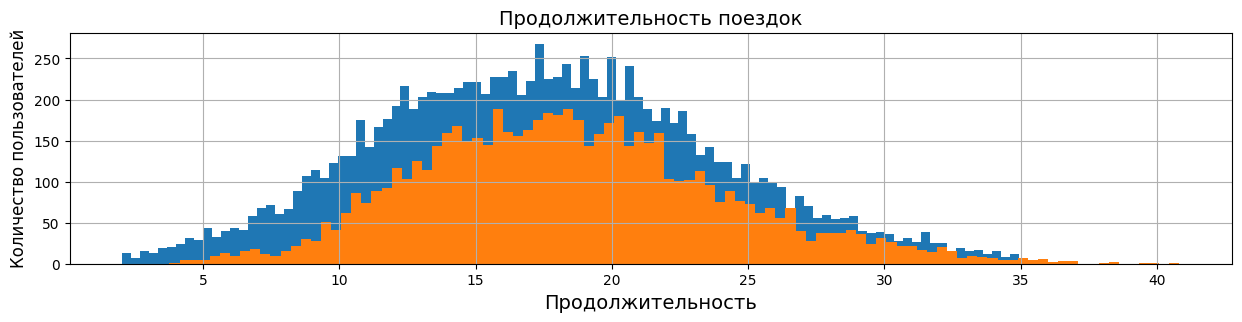

In [29]:
data_free.duration.hist(bins = 100, figsize = (15,3));
data_ultra.duration.hist(bins = 100, figsize = (15,3));
plt.title("Продолжительность поездок", fontsize=14)
plt.xlabel("Продолжительность", fontsize=14)
plt.ylabel("Количество пользователей", fontsize=12);
print(data_free['duration'].describe())
print(data_ultra['duration'].describe())

- Информация о расстоянии

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


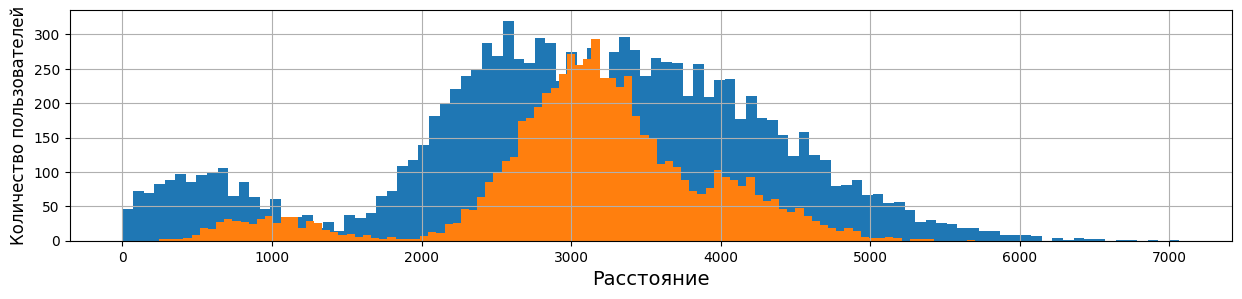

In [30]:
data_free.distance.hist(bins = 100, figsize = (15,3));
data_ultra.distance.hist(bins = 100, figsize = (15,3));
plt.xlabel("Расстояние", fontsize=14)
plt.ylabel("Количество пользователей", fontsize=12);
print(data_free['distance'].describe())
print(data_ultra['distance'].describe())


### Вывод
- Объединили данные о пользователях, поездках и подписках в один датафрейм
- Создали ещё два датафрейма с данными о пользователях без подписки и с данными о пользователях с подпиской.
- Создали графики о расстоянии и времени поездок для пользователей обеих категорий.
- Пользователи обеих категорий распределены по временипоезки одинаково.
- Пользователи категории ultra более выраженно проезжают расстояние в районе 3000 метров, а у пользователей категории free расстояниие варьируется от 2000 до 4500 метров.

## Шаг 5. Подсчёт выручки

#### 5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [31]:
data['duration'] = np.ceil(data['duration']) 
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [32]:
data_group = data.groupby(['user_id','month'])\
                 .agg(metres=('distance', 'sum'), 
                     trips=('month', 'count'), 
                     minutes=('duration', 'sum'), 
                     subscription=('subscription_type','min'))

data_group.head()

metres  trips  minutes subscription
user_id month                                          
1       1      7027.511294      2     42.0        ultra
        4       754.159807      1      7.0        ultra
        8      6723.470560      2     46.0        ultra
        10     5809.911100      2     32.0        ultra
        11     7003.499363      3     56.0        ultra

#### 5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 преобразуем к 26.

In [33]:
def revenue_month(row):
    
    if row['subscription'] == 'ultra':
        return (row['minutes'] * 6 + 199)
    elif row['subscription'] == 'free':
        return (row['minutes'] * 8 + row['trips'] * 50)
    

In [34]:
data.groupby(['user_id','month'])\
                 .agg(metres=('distance', 'sum'), 
                     trips=('month', 'count'), 
                     minutes=('duration', 'sum'), 
                     subscription=('subscription_type','min'),
                     minute_price=('minute_price', 'first'),
                     start_ride_price=('start_ride_price', 'first'),
                     subscription_fee=('subscription_fee', 'first'))

metres  trips  minutes subscription  minute_price  \
user_id month                                                            
1       1       7027.511294      2     42.0        ultra             6   
        4        754.159807      1      7.0        ultra             6   
        8       6723.470560      2     46.0        ultra             6   
        10      5809.911100      2     32.0        ultra             6   
        11      7003.499363      3     56.0        ultra             6   
...                     ...    ...      ...          ...           ...   
1534    6       3409.468534      2     26.0         free             8   
        8       7622.453034      2     48.0         free             8   
        9       4928.173852      1     23.0         free             8   
        11     13350.015305      4     78.0         free             8   
        12      2371.711192      1     16.0         free             8   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
...                         ...               ...  
1534    6                    50                 0  
        8                    50                 0  
        9                    50                 0  
        11                   50                 0  
        12                   50                 0  

[11300 rows x 7 columns]

In [35]:
data_group['revenue'] = data_group.apply(revenue_month, axis=1)
data_group.head(-1)

metres  trips  minutes subscription  revenue
user_id month                                                    
1       1       7027.511294      2     42.0        ultra    451.0
        4        754.159807      1      7.0        ultra    241.0
        8       6723.470560      2     46.0        ultra    475.0
        10      5809.911100      2     32.0        ultra    391.0
        11      7003.499363      3     56.0        ultra    535.0
...                     ...    ...      ...          ...      ...
1534    4       3434.290912      1     15.0         free    170.0
        6       3409.468534      2     26.0         free    308.0
        8       7622.453034      2     48.0         free    484.0
        9       4928.173852      1     23.0         free    234.0
        11     13350.015305      4     78.0         free    824.0

[11299 rows x 5 columns]

### Вывод
- Создали датафрейм с агрегированными данными о поездках по месяцам.

#### Шаг 6. Проверка гипотез

#### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Н0: среднее время поездки тарифов «ultra» и «free» равны. 
Н1: среднее время поездки тарифа «ultra» больше чем тарифа «free».

Критический уровень статистической значимости присвоим значением 0.05.

In [36]:
time_ultra = data_ultra['duration']

time_free = data_free['duration']

print('Среднее время поездки тарифа ultra: ', time_ultra.mean())
print('Среднее время поездки тарифа free: ', time_free.mean())

alpha = 0.05
results_time = st.ttest_ind(time_ultra, time_free, alternative='greater') 

print('p-значение:', results_time.pvalue)

if(results_time.pvalue > alpha):
    print('Подтверждаем нулевую гипотезу')
else:
    print('Подтверждаем альтернативную гипотезу')

Среднее время поездки тарифа ultra:  18.54198516280583
Среднее время поездки тарифа free:  17.530771268800226
p-значение: 4.7044680744539e-28
Подтверждаем альтернативную гипотезу


- Можем сказать, что среднее время поездки по двум тарифам различается. Т.к. гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону среднее время поездки отличается. Однако посчитав среднее время поездки для обоих тарифов, с уверенностью можем сказать: среднее время поездки из тарифа free ниже.

#### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу.

Н0: среднее растояние поездки тарифа ultra равно 3130.
Н1: среднее растояние поездки тарифа ultra больше 3130.

Критический уровень статистической значимости присвоим значением 0.05.

In [37]:
metres_mean = data_ultra['distance']


print('Среднее растояние поездки тарифа ultra: ', metres_mean.mean())

distance = 3130

alpha = 0.05

results_distance = st.ttest_1samp(metres_mean, distance, alternative='greater')

print('p-значение:', results_distance.pvalue)

if (results_distance.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

Среднее растояние поездки тарифа ultra:  3115.4453880370247
p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


- Можем сказать, что среднее расстояние поездки на тарифе ultra меньше 3130 метров, что оптимально с точки зрения износа самоката.

#### 6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Н0: средняя выручка тарифа «ultra» равна средней выручке тарифа «free». 
Н1: средняя выручка тарифа «ultra» больше чем тарифа «free».

Критический уровень статистической значимости присвоим значением 0.05.

In [38]:
revenue_ultra = (data_group['revenue']
                .loc[data_group['subscription'] == 'ultra']  
                )

revenue_free = (data_group['revenue']
                .loc[data_group['subscription'] == 'free']  
               )

print('Средняя выручка тарифа ultra: ', revenue_ultra.mean())
print('Средняя выручка тарифа free: ', revenue_free.mean())

alpha = 0.05
results_revenue = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater') 

print('p-значение:', results_revenue.pvalue)

if(results_revenue.pvalue > alpha):
    print('Подтверждаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Средняя выручка тарифа ultra:  362.7921906022502
Средняя выручка тарифа free:  329.3326437121324
p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


- Можем сказать, что средняя выручка по двум тарифам различается. Т.к. гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону среднее время поездки отличается. Однако посчитав среднюю выручку для обоих тарифов, с уверенностью можем сказать: средняя выручка из тарифа ultra выше.

#### 6.4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для решения указанной задачи необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок.
Гипотезы будут сформулированы так:
H0: средние значения количества обращений в техподдержку до изменений (μ1) равны средним значениям количества обращений в техподдержку после изменений (μ2);
H1: средние значения количества обращений в техподдержку до изменений (μ1) не равны средним значениям количества обращений в техподдержку после изменений (μ2);
Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

#### Общий вывод
1) Данные по выборке клиентов популярного сервиса аренды самокатов GoFast загружены, проанализированы и обработаны. Пропусков не обнаружено.
2) Описана и визуализирована общую информацию о пользователях и поездках. Результаты предтавлены в сводных таблицах и графиках.Из низ видим, что: больше всего пользователей в Пятигорске 219, Екатеринбурге 204 и Ростове-на-Дону 198, пользователей с подпиской меньше чем без неё, средний возраст пользователей 25 лет, расстояние которое проезжают пользовотели в среднем около 3100 метров и у пользователей на это уходит около 18 минут.
3) Три датафрейма были обьеденены в один и созданы два новые c данными о пользователях без подписки и с данными о пользователях с подпиской для дальнейших исследований. Были визуализированны данные о расстоянии и времени поездок для пользователей обеих категорий.
4) Была рассчитана для каждого пользователя помесячно: суммарное расстояние, количество поездок и суммарное время поездок. А так же помесячная выручка, которую принёс каждый пользователь. 
5) Проверено несколько гипотез на основании которых можно сделать вывод что:
- Среднее время поездки тарифа ultra болье чем среднее время поездки тарифа free.
- Среднее расстояние поездки на тарифе ultra меньше оптимального с точки зрения износа самоката.
- Средняя выручка тарифа ultra больше средней выручки тарифа free на 10%.

- Делаем вывыд, что тариф ultra выглядит более оптимальным для продвижения.